In [73]:
%load_ext autoreload
%autoreload 2
from cosypose.rendering.bullet_scene_renderer import BulletSceneRenderer
from cosypose.datasets.datasets_cfg import make_scene_dataset
from bokeh.io import output_notebook, show; output_notebook()
from bokeh.plotting import gridplot
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from cosypose.lib3d import Transform
from cosypose.visualization.plotter import Plotter
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

In [74]:
# ds_name, urdf_ds_name = 'synthetic.ycbv-1M.train', 'ycbv'
# ds_name, urdf_ds_name = 'tless.primesense.test', 'tless.cad'
ds_name, urdf_ds_name = 'bracket_assembly', 'bracket_assembly'
scene_ds = make_scene_dataset(ds_name)

1 day, 3:04:59.565672 - Building index and loading annotations...


[Memory]97499.7s, 1625.0min: Loading build_index...
Destroy EGL OpenGL window.


In [101]:
def get_random_image(scene_ds, idx=None):
    renderer = BulletSceneRenderer(urdf_ds_name)
    if idx is None:
        idx = np.random.randint(len(scene_ds))
#     print("idx:", idx)
    ds_rgb, mask, state = scene_ds[idx]
    
    objects = state['objects']
    camera = state['camera']
    print([o['bbox'] for o in objects])
#     print(camera)
    cameras = [camera]
    image = renderer.render_scene(objects, cameras)[0]['rgb']
    renderer.disconnect()
    return ds_rgb, image

ds_rgb, render_rgb = get_random_image(scene_ds, idx=20)

plotter = Plotter()
fig_ds_rgb = plotter.plot_image(ds_rgb)
fig_render_rgb = plotter.plot_image(render_rgb)
fig_overlay = plotter.plot_overlay(ds_rgb, render_rgb)
show(gridplot([[fig_ds_rgb, fig_render_rgb, fig_overlay]], sizing_mode='scale_width'))

EGL device choice: 0 of 4 (from EGL_VISIBLE_DEVICES)


[[44, 0, 719, 539], [305, 256, 483, 368], [468, 245, 680, 456], [286, 230, 577, 528], [0, 0, 138, 539], [0, 0, 159, 131], [0, 296, 354, 539]]
Loaded EGL 1.5 after reload.
GL_VENDOR=NVIDIA Corporation
GL_RENDERER=Tesla T4/PCIe/SSE2
GL_VERSION=4.6.0 NVIDIA 510.73.08
GL_SHADING_LANGUAGE_VERSION=4.60 NVIDIA
Version = 4.6.0 NVIDIA 510.73.08
Vendor = NVIDIA Corporation
Renderer = Tesla T4/PCIe/SSE2
ven = NVIDIA Corporation
Destroy EGL OpenGL window.


In [76]:
image

Figure(id='2463', ...)

In [ ]:

ds_name, urdf_ds_name = 'tless.primesense.test', 'tless.cad'
scene_ds = make_scene_dataset(ds_name)
def get_random_image(scene_ds, idx=None):
    renderer = BulletSceneRenderer(urdf_ds_name)
    if idx is None:
        idx = np.random.randint(len(scene_ds))
    print("idx:", idx)
    ds_rgb, mask, state = scene_ds[idx]
    
    objects = state['objects']
    camera = state['camera']
    print(objects)
    print(camera)
    cameras = [camera]
    image = renderer.render_scene(objects, cameras)[0]['rgb']
    renderer.disconnect()
    return ds_rgb, image

ds_rgb, render_rgb = get_random_image(scene_ds)

plotter = Plotter()
fig_ds_rgb = plotter.plot_image(ds_rgb)
fig_render_rgb = plotter.plot_image(render_rgb)
fig_overlay = plotter.plot_overlay(ds_rgb, render_rgb)
show(gridplot([[fig_ds_rgb, fig_render_rgb, fig_overlay]], sizing_mode='scale_width'))

In [91]:
from pathlib import Path
import torch
LOCAL_DATA = Path('/home/ubuntu/synthetic_pose_estimation/cosypose/local_data')
DEBUG_DATA_DIR = LOCAL_DATA / 'debug_data'
debug_file = open(DEBUG_DATA_DIR/'debug_iter=1.pth.tar','rb')
debug_data = torch.load(debug_file)
print(len(debug_data['images']))

7


In [92]:
print(debug_data['model_outputs'])

{'pose': tensor([[ 9.2075e-01, -3.6640e-01, -1.1451e+00, -8.4092e-01,  4.1163e-02,
         -9.3517e-01, -2.5674e+01, -3.3025e+01,  2.6332e+00],
        [ 7.9916e+00, -1.1860e+01, -9.8075e+00, -4.0472e+01, -3.3371e+00,
         -4.4543e+01, -1.0120e+03, -9.5903e+02,  1.5789e+01],
        [ 3.5684e+00, -4.3055e+00, -4.0110e+00, -1.5355e+01, -1.0658e+00,
         -1.7248e+01, -3.9389e+02, -3.7708e+02,  7.4650e+00],
        [ 5.5144e+00, -7.6427e+00, -6.7783e+00, -2.7065e+01, -2.2879e+00,
         -3.0269e+01, -6.8585e+02, -6.5175e+02,  1.1186e+01],
        [ 4.0995e+00, -4.7309e+00, -4.0378e+00, -1.7754e+01, -1.2045e+00,
         -2.0038e+01, -4.6000e+02, -4.4162e+02,  9.4915e+00],
        [ 2.3118e+00, -1.9308e+00, -2.1395e+00, -7.4267e+00, -3.2022e-01,
         -8.2511e+00, -1.9485e+02, -1.9210e+02,  4.8812e+00],
        [ 2.4434e+00, -2.4132e+00, -2.6830e+00, -9.2829e+00, -5.6468e-01,
         -1.0418e+01, -2.4092e+02, -2.3477e+02,  5.3208e+00]], device='cuda:0')}


(540, 720, 3)
(7, 2000, 2)
uv [ 428.07266 -103.98952]
uv [386.285   279.31116]
uv [631.2781 287.4834]
uv [608.2918  359.63034]
uv [185.48964 467.2252 ]
uv [ 24.909369 203.37651 ]
uv [135.15417 613.0962 ]


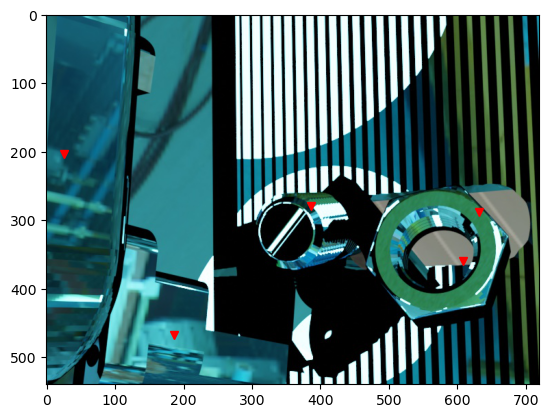

In [93]:
import matplotlib.pyplot as plt
im = debug_data['images'][0].cpu().numpy()
if im.shape[0] == 3:
    im = im.transpose((1, 2, 0))
    im = im[..., :4]
    print(im.shape)
imgplot = plt.imshow(im)
uv = debug_data['uv'].cpu().numpy()
print(uv.shape)
for i in range(uv.shape[0]):    
    print("uv", uv[i,0,...])
    plt.plot(uv[i,0,0], uv[i,0,1], marker='v', color="red")
plt.imshow(im)
plt.show()

In [45]:
print(debug_data["points"])

tensor([[[-0.1181,  0.0127,  0.0876],
         [-0.1245,  0.0000,  0.1026],
         [-0.1181,  0.0000,  0.0607],
         ...,
         [ 0.1348,  0.0111,  0.0575],
         [ 0.1354,  0.0000,  0.0942],
         [-0.1290,  0.0124,  0.0524]],

        [[ 0.0077, -0.0020,  0.0080],
         [ 0.0057,  0.0039,  0.0393],
         [ 0.0044, -0.0053,  0.0407],
         ...,
         [-0.0077,  0.0021,  0.0090],
         [ 0.0049,  0.0049,  0.0333],
         [ 0.0035,  0.0059,  0.0314]],

        [[-0.0047,  0.0065,  0.0062],
         [-0.0027, -0.0076,  0.0067],
         [-0.0120, -0.0067,  0.0059],
         ...,
         [ 0.0080,  0.0011, -0.0066],
         [-0.0011,  0.0080, -0.0040],
         [-0.0081,  0.0005,  0.0023]],

        ...,

        [[-0.0277,  0.0245, -0.0509],
         [ 0.0144,  0.0281, -0.0530],
         [ 0.0357,  0.0053, -0.0494],
         ...,
         [ 0.0276, -0.0178, -0.0472],
         [ 0.0332, -0.0019, -0.0474],
         [ 0.0127,  0.0290, -0.0487]],

        [[

In [31]:
for key, value in debug_data.items():
#     if key == "images_crop":
    print(key, value)

boxes_rend tensor([[-1043.2275,  -730.4111, -1011.7446,  -709.8492]], device='cuda:0')
rend_center_uv tensor([[[-1012.5711,  -710.5408]]], device='cuda:0')
uv tensor([[[-1029.1736,  -715.4337],
         [-1030.3945,  -720.5253],
         [-1036.9443,  -718.5473],
         ...,
         [-1038.0593,  -715.4976],
         [-1041.6578,  -717.5955],
         [-1037.3180,  -715.1656]]], device='cuda:0')
boxes_crop tensor([[-1055.4901,  -742.7300,  -969.6521,  -678.3515]], device='cuda:0')
TCO_input tensor([[[-0.3556,  0.5493,  0.7562, -2.8986],
         [-0.7925, -0.6061,  0.0676, -2.0704],
         [ 0.4955, -0.5752,  0.6509,  3.0963],
         [ 0.0000,  0.0000,  0.0000,  1.0000]]], device='cuda:0')
TCO_output tensor([[[ -0.3319,   0.5378,   0.7750, -12.0943],
         [ -0.7132,  -0.6808,   0.1669,  -8.5493],
         [  0.6174,  -0.4974,   0.6095,  13.0572],
         [  0.0000,   0.0000,   0.0000,   1.0000]]], device='cuda:0')
K_crop tensor([[[5.4639e+03, 0.0000e+00, 5.2745e+03],
      

In [22]:
plotter = Plotter()
image = plotter.plot_image(debug_data['images'][2])
image = plotter.plot_maskrcnn_bboxes(image, debug_data['boxes_crop'],  text_auto=False) 
show(image)
# fig_overlay = plotter.plot_overlay(ds_rgb, render_rgb)

In [88]:
debug_data['boxes_rend']
debug_data['rend_center_uv']
debug_data['uv']
debug_data['K']

KeyError: 'K'

In [100]:
image_crop = plotter.plot_image(debug_data['images_crop'][6])
show(image_crop)